In [1]:
from matplotlib import pyplot as plt
import random as rnd
import numpy as np
import pandas as pd
from collections import Counter

# Problem 1

In [2]:
class Condorcet():

    def __init__(self, jurors, accuracy, trials=10000):
        """Initializes the jury and outcomes of trials"""
        self.jurors = jurors
        self.jury_accuracy = accuracy
        self.outcomes = [rnd.choice([0,1]) for _ in range(trials)]
        self.verdicts = []
        self.trials = trials

    def make_verdicts(self):
        """Makes a verdict for every outcome by taking the majority vote of the jury"""
        for out in self.outcomes:
            verdict = [] 
            for _ in range(self.jurors):
                if rnd.random() < self.jury_accuracy:
                    verdict.append(out)
                else:
                    verdict.append(1-out)
            self.verdicts.append(Counter(verdict).most_common(1)[0][0])

    def group_accuracy(self):
        """Given outcomes and verdicts, return the group accuracy of the jurors"""
        correct = 0
        for i in range(len(self.outcomes)):
            if self.verdicts[i] == self.outcomes[i]:
                correct += 1
        accuracy = correct/len(self.outcomes)
        return accuracy

In [3]:
res = [[], [], []]
jury_size = [11, 21, 31]
for i in range(0, len(jury_size)):
    for accuracy in range(0, 101):
        condorcet = Condorcet(int(jury_size[i]), accuracy / 100)
        condorcet.make_verdicts()
        res[i].append(condorcet.group_accuracy())
x = [accuracy / 100 for accuracy in range(0, 101)]

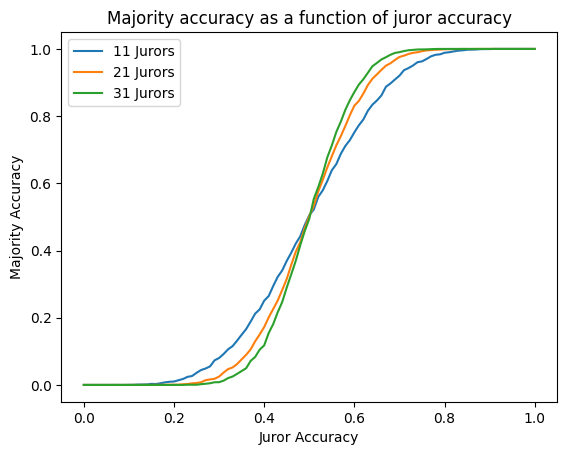

In [4]:
plt.plot(x, res[0], label = "11 Jurors")
plt.plot(x, res[1], label = "21 Jurors")
plt.plot(x, res[2], label = "31 Jurors")
plt.xlabel("Juror Accuracy")
plt.ylabel("Majority Accuracy")
plt.title("Majority accuracy as a function of juror accuracy")
plt.legend()

# Problem 2

In [5]:
class Infection():

    def __init__(self, students, days, psick, pinfect):
        """Initializes the parameters of this model"""

        self.students = students
        self.days = days
        self.pinfect = pinfect
        self.state = []
        self.flip = []

        self.history = []

        for _ in range(students):
            if rnd.random() < psick:
                self.state.append(1)
                self.flip.append(True)
            else:
                self.state.append(0)
                self.flip.append(False) 
        
    def in_bounds(self, i):
        """Returns true if i is in bound for length students"""
        return i >= 0 and i < self.students

    def forward(self):
        """Progresses the model by one step by updating its parameters"""

        # first pass: who is recovering at the end of the day
        for i in range(self.students):
            if self.state[i] == 1:
                self.flip[i] = True
            else:
                self.flip[i] = False

        # second pass: who is getting sick this day
        for i in range(self.students):
            if self.state[i] == 1:
                # if this person is sick, and the neighbor is not sick, and rnd.random() is smaller than pinfect, then the neighbor becomes infected
                if self.in_bounds(i - 1) and self.state[i - 1] == 0 and rnd.random() < self.pinfect:
                    self.state[i - 1] = 1
                if self.in_bounds(i + 1) and self.state[i + 1] == 0 and rnd.random() < self.pinfect:
                    self.state[i + 1] = 1
        
        # third pass: changing the digit to 0 for people who recover
        for i in range(self.students):
            if self.flip[i]:
                self.state[i] = 0

    def model(self):
        """Calls forward() m times, m being the number of days we model for"""
        for _ in range(self.days):
            self.history.append(self.state.copy())
            self.forward()


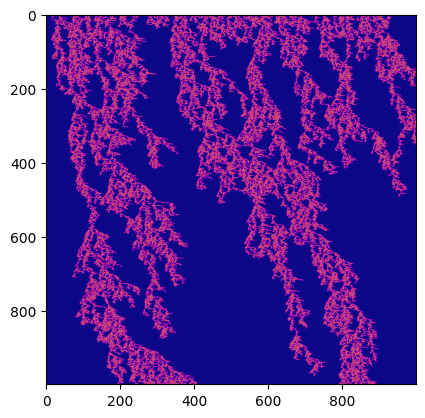

In [6]:
infection = Infection(1000, 1000, 0.15, 0.63)
infection.model()
HIST = np.array(infection.history)
plt.imshow(HIST, cmap="plasma")
plt.show()

The minimum value for $p_{infect}$ where the disease persists in the population without dying out is 0.63, at around 0.9 virtually everyone becomes infected.

# Problem 3

In [7]:
min_y = 42.2
max_y = 42.4
min_x = -71.2
max_x = -70.9

In [8]:
def latitude_map(latitude, longitude):
    """Returns the corresponding array (i,j) of the given latitude and longitude"""
    y_interval = (max_y - min_y) / 1000
    x_interval = (max_x - min_x) / 1000
    i = int(1000 - (latitude - min_y) / y_interval)
    j = int((longitude - min_x) / x_interval)
    return i, j

In [9]:
data = pd.read_csv('trees.csv')
map = np.zeros((1000, 1000), dtype=int)
# bottom left, (1000, 0)
print(latitude_map(min_y, min_x))
# top right, (0, 1000)
print(latitude_map(max_y, max_x))
# bottom right, (1000, 1000)
print(latitude_map(min_y, max_x))
# top left, (0, 0)
print(latitude_map(max_y, min_x))

(1000, 0)
(0, 1000)
(1000, 1000)
(0, 0)


In [10]:
trees = data.loc[:, ["X", "Y"]]
for index, row in trees.iterrows():
    i, j = latitude_map(row.loc["Y"], row.loc["X"])
    map[i][j] += 1

This is the accurate visual of the tree distribution, which is not very satisfying as it does not accomplish its purpose of helping visualize the data.

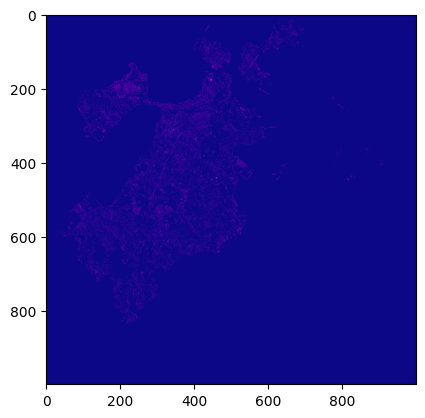

In [11]:
plt.imshow(map, cmap="plasma")
plt.show()

Here, I tinkered with the vmax to get a better visualization of the data. 

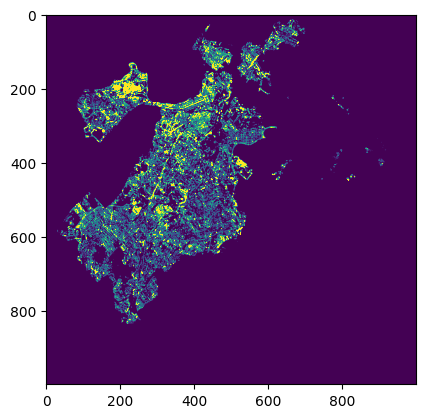

In [12]:
plt.imshow(map, vmax = 3)
plt.show()